In [524]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [525]:
# load data
class_train = pd.read_csv(r"CS98XClassificationTrain.csv")
class_test = pd.read_csv(r"CS98XClassificationTest.csv")

# CLASS_TRAIN - DATA ANALYSIS


In [526]:
# dimensions: 453 rows × 15 columns
class_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 47.8+ KB


In [354]:
# columns
list(class_train.columns.values.tolist()) 


['Id',
 'title',
 'artist',
 'year',
 'bpm',
 'nrgy',
 'dnce',
 'dB',
 'live',
 'val',
 'dur',
 'acous',
 'spch',
 'pop',
 'top genre']

There are 15 columns/features in the class_train dataset: Id',
 'title',
 'artist',
 'year',
 'bpm',
 'nrgy',
 'dnce',
 'dB',
 'live',
 'val',
 'dur',
 'acous',
 'spch',
 'pop',
 'top genre'.

where:
top genre: genre of the song
year: year of the song (due to re-releases, the year might not correspond to the release year of the original song)
bpm(beats per minute): beats per minute
nrgy(energy): energy of a song, the higher the value the more energetic the song is
dnce(danceability): the higher the value, the easier it is to dance to this song.
dB(loudness): the higher the value, the louder the song.
live(liveness): the higher the value, the more likely the song is a live recording.
val(valence): the higher the value, the more positive mood for the song.
dur(duration): the duration of the song.
acous(acousticness): the higher the value the more acoustic the song is.
spch(speechiness): the higher the value the more spoken word the song contains.
pop(popularity): the higher the value the more popular the song is.


### Missing Values ?

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

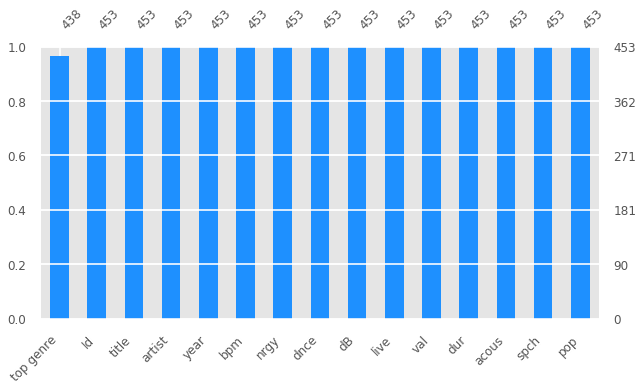

In [527]:
# check for MISSING values / null values
import missingno as msno
msno.bar(class_train, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
class_train.isnull().sum() 

There are 15 null values in the column "top genre". This is quite insignificant compared to the rest of the dataset so these values can be removed.

# LOOKING AT NULL VALUES

In [528]:
null_data = class_train[class_train.isnull().any(axis=1)]
null_data



,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
8,9,Someone Elses Roses,Joan Regan,2019,100,14,29,-10,15,32,143,89,3,34,NaN
26,27,Drinks On The House,Green Martini Keys,2016,97,16,57,-16,11,15,181,100,5,28,NaN
72,73,Pachuko Hop,Ike Carpenter Orchestra,2006,83,53,48,-9,34,80,135,59,3,28,NaN
90,91,Little Things Means A Lot,Jayne Mansfield,2008,109,29,70,-15,16,63,172,36,4,29,NaN
98,99,The Lady Is A Tramp,Mel Torme & the Mel-Tones,2016,138,60,41,-8,41,54,170,81,6,40,NaN
220,221,If I Give My Heart To You,The Teddy Bears,2011,113,29,49,-10,12,29,118,86,3,40,NaN
252,253,Happy Days And Lonely Nights,Suzi Miller And Johnson Brothers,2012,142,38,65,-8,13,69,146,43,3,27,NaN
265,266,Stairway Of Love,Terry Dene,2015,93,62,62,-7,25,86,120,55,4,27,NaN
266,267,You,Ten Sharp,1991,174,90,41,-8,19,67,273,43,3,61,NaN


Unchained Melody	The Teddy Bear = pop
Someone Elses Roses	Joan Regan = 	adult standards
Drinks On The House	Green Martini Keys = Pop
Pachuko Hop	Ike Carpenter Orchestra = Blues
Little Things Means A Lot	Jayne Mansfield = Jazz, Pop
The Lady Is A Tramp	Mel Torme & the Mel-Tones = Pop
If I Give My Heart To You	The Teddy Bears	= Pop
Happy Days And Lonely Nights	Suzi Miller And Johnson Brothers = Rock
Stairway Of Love	Terry Dene = Rock
You	Ten Sharp = Pop
No Other Love	Bob Sharples & His Music = Vocal/Easy Listening
I've Waited So Long	Anthony Newley = ? (Dance/ Electronic)
Hot Diggity	Stargazers	= Folk =
Ain't That Just the Way	Lutricia McNeal =  R&B/Soul
I Promised Myself	Nick Kamen = Pop





In [453]:
class_train.loc[class_train['title'] == 'Unchained Melody', 'top genre'] = 'pop'
class_train.loc[class_train['title'] == 'Someone Elses Roses', 'top genre'] = 'adult standards'
class_train.loc[class_train['title'] == 'Drinks On The House', 'top genre'] = 'pop'
class_train.loc[class_train['title'] == 'Pachuko Hop', 'top genre'] = 'blues'
class_train.loc[class_train['title'] == 'Little Things Means A Lot', 'top genre'] = 'blues'
class_train.loc[class_train['title'] == 'The Lady Is A Tramp', 'top genre'] = 'pop'
class_train.loc[class_train['title'] == 'If I Give My Heart To You', 'top genre'] = 'pop'
class_train.loc[class_train['title'] == 'Happy Days And Lonely Nights','top genre'] = 'rock'
class_train.loc[class_train['title'] == 'Stairway Of Love','top genre'] = 'rock'
class_train.loc[class_train['title'] == 'You', 'top genre'] = 'pop'
class_train.loc[class_train['title'] == 'No Other Love' , 'top genre'] = 'adult standards'  
class_train.loc[class_train['title'] == "Hot Diggity" , 'top genre'] = 'folk'
class_train.loc[class_train['title'] == "Ain't That Just the Way" , 'top genre'] = 'r&b'
class_train.loc[class_train['title'] == "I Promised Myself" , 'top genre'] = 'pop'


# dropping NULL values  (I've Waited So Long Anthony Newley = ? (Dance/ Electronic))
class_train = class_train.dropna(axis=0)


In [529]:
class_train = class_train.dropna(axis=0)

In [559]:
# check again for null values
class_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         408 non-null    int64 
 1   title      408 non-null    object
 2   artist     408 non-null    object
 3   year       408 non-null    int64 
 4   bpm        408 non-null    int64 
 5   nrgy       408 non-null    int64 
 6   dnce       408 non-null    int64 
 7   dB         408 non-null    int64 
 8   live       408 non-null    int64 
 9   val        408 non-null    int64 
 10  dur        408 non-null    int64 
 11  acous      408 non-null    int64 
 12  spch       408 non-null    int64 
 13  pop        408 non-null    int64 
 14  top genre  408 non-null    object
dtypes: int64(12), object(3)
memory usage: 46.2+ KB


There are no more null values... 
Data types: title, artist, and top genre columns contain objects, all others contain integers

In [218]:
class_train

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
5,6,Grenade,Bruno Mars,2010,110,56,71,-7,12,23,223,15,6,74,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,adult standards
449,450,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,brill building pop
450,451,Dilemma,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,dance pop
451,452,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,boy band


## Dataset adjustment ...

Adding a column to make the popularity of a song more clear (like/dislike). I.e where pop > 50 = 1, pop < 50 = 2. Assumption: pop on a 0 to 100 scale.
### Like or Dislike ?

In [9]:
conditions = [
    (class_train['pop'] >= 55),
    (class_train['pop'] < 55) ]
values = [1, 2]
class_train['like'] = np.select(conditions, values)

C:\Users\caela\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


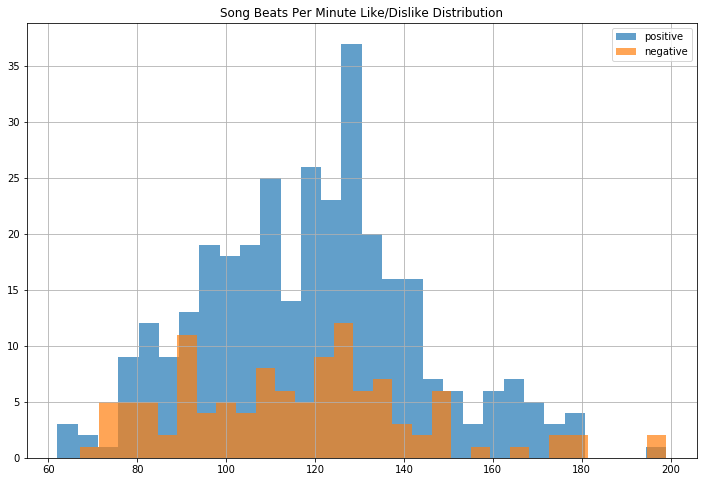

In [10]:
pos_bpm = class_train[class_train['like'] == 1]['bpm']
neg_bpm = class_train[class_train['like'] == 2]['bpm']
fig = plt.figure(figsize=(12,8))
plt.title("Song Beats Per Minute Like/Dislike Distribution")
pos_bpm.hist(alpha = 0.7, bins = 30, label = 'positive')
neg_bpm.hist(alpha = 0.7, bins = 30, label = 'negative')
plt.legend(loc='upper right')

In [11]:
# for all features
pos_bpm = class_train[class_train['like'] == 1]['bpm']
neg_bpm = class_train[class_train['like'] == 2]['bpm']
pos_nrgy = class_train[class_train['like'] == 1]['nrgy']
neg_nrgy = class_train[class_train['like'] == 2]['nrgy']
pos_db = class_train[class_train['like'] == 1]['dB']
neg_db = class_train[class_train['like'] == 2]['dB']
pos_live = class_train[class_train['like'] == 1]['live']
neg_live = class_train[class_train['like'] == 2]['live']
pos_dur = class_train[class_train['like'] == 1]['dur']
neg_dur = class_train[class_train['like'] == 2]['dur']
pos_acous = class_train[class_train['like'] == 1]['acous']
neg_acous = class_train[class_train['like'] == 2]['acous']
pos_spch = class_train[class_train['like'] == 1]['spch']
neg_spch = class_train[class_train['like'] == 2]['spch']
pos_val = class_train[class_train['like'] == 1]['val']
neg_val = class_train[class_train['like'] == 2]['val']
pos_dnce = class_train[class_train['like'] == 1]['dnce']
neg_dnce = class_train[class_train['like'] == 2]['dnce']

C:\Users\caela\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
C:\Users\caela\anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\caela\anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the

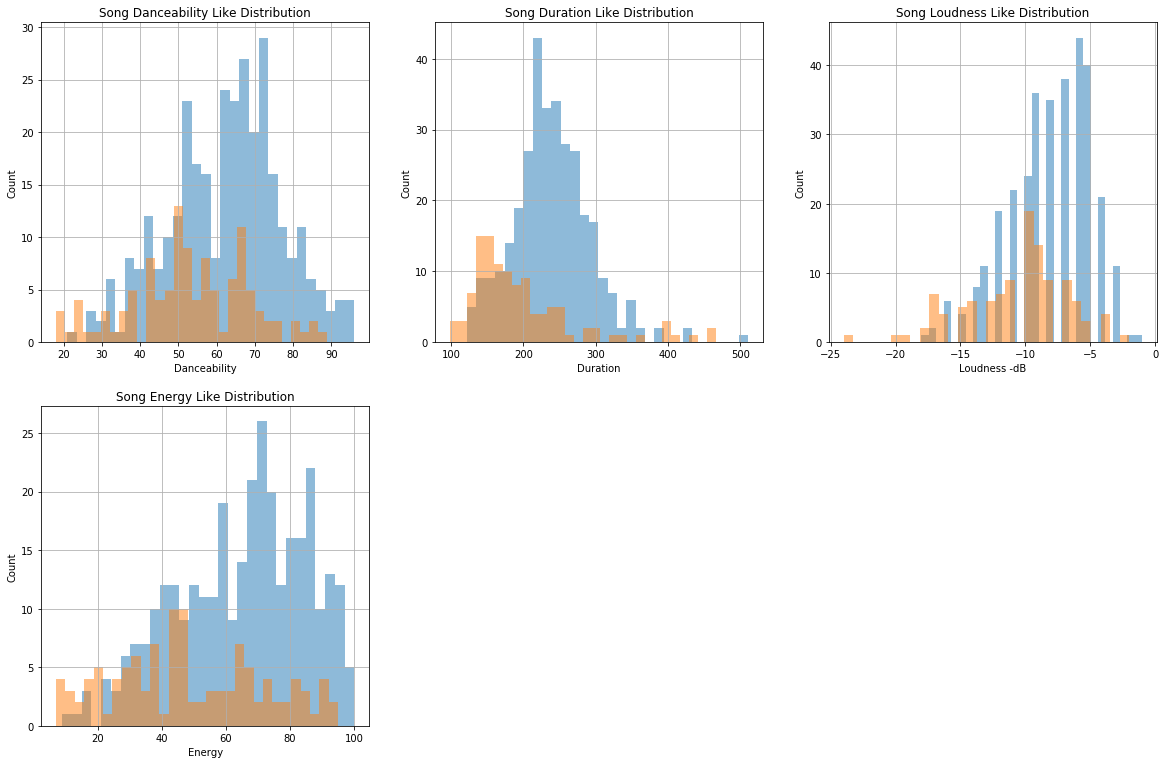

In [12]:
fig2 = plt.figure(figsize=(20,20))
#dnce
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')

pos_dnce.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)

neg_dnce.hist(alpha=0.5, bins=30)

#duration
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like Distribution')

pos_dur.hist(alpha=0.5, bins=30)
ax6 = fig2.add_subplot(332)

neg_dur.hist(alpha=0.5, bins=30)

# loudness (dB)
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness -dB')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like Distribution')

pos_db.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(333)

neg_db.hist(alpha=0.5, bins=30)

# energy
ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Energy')
ax9.set_ylabel('Count')
ax9.set_title('Song Energy Like Distribution')

pos_nrgy.hist(alpha=0.5, bins=30)
ax9 = fig2.add_subplot(334)

neg_nrgy.hist(alpha=0.5, bins=30)


In [13]:
pos_dnce

2      63
3      47
4      56
5      71
7      64
       ..
444    56
445    79
450    73
451    64
452    68
Name: dnce, Length: 324, dtype: int64

The new dimensions for class_train: 438 rows × 15 columns

### Genre

In [14]:
# TOP GENRE...
array = class_train['top genre'].unique()
#class_train['top genre'].nunique()
#class_train['top genre'].value_counts()[:10].sort_values(ascending=False)
import xlsxwriter
array

array(['adult standards', 'glam rock', 'pop', 'album rock', 'boy band',
       'brill building pop', 'rock-and-roll', 'country rock',
       'canadian pop', 'dance pop', 'europop', 'bebop', 'art rock',
       'disco', 'blues', 'barbadian pop', 'deep adult standards',
       'deep house', 'atl hip hop', 'dance rock', 'disco house',
       'bubblegum dance', 'classic soul', 'classic uk pop',
       'east coast hip hop', 'doo-wop', 'britpop', 'british blues',
       'soft rock', 'australian talent show', 'art pop', 'british soul',
       'british invasion', 'belgian pop', 'big room', 'german dance',
       'italian pop', 'british folk', 'brit funk', 'chicago soul',
       'neo mellow', 'british comedy', 'hip hop', 'new wave pop',
       'eurodance', 'detroit hip hop', 'classic rock', 'uk garage',
       'afrobeat', 'r&b', 'chicago rap', 'classic danish pop',
       'british dance band', 'drone folk', 'permanent wave', 'merseybeat',
       'g funk', 'blues rock', 'celtic rock', 'bow pop',


In [15]:
array = class_train['top genre'].value_counts()

In [16]:
import pandas as pd


df = pd.DataFrame(array).T
df.to_excel(excel_writer = r"C:\Users\caela\Big_d_funda\CS986 Fundamentals of Machine Learning\test.xlsx")

There are 86 unique genres of music in this dataset. The top 10 most popular genres are: adult standards       68,
album rock            66,
dance pop             61,
glam rock             16,
brill building pop    16,
europop               14,
dance rock            13,
boy band              10,
british invasion       8,
art rock               7.

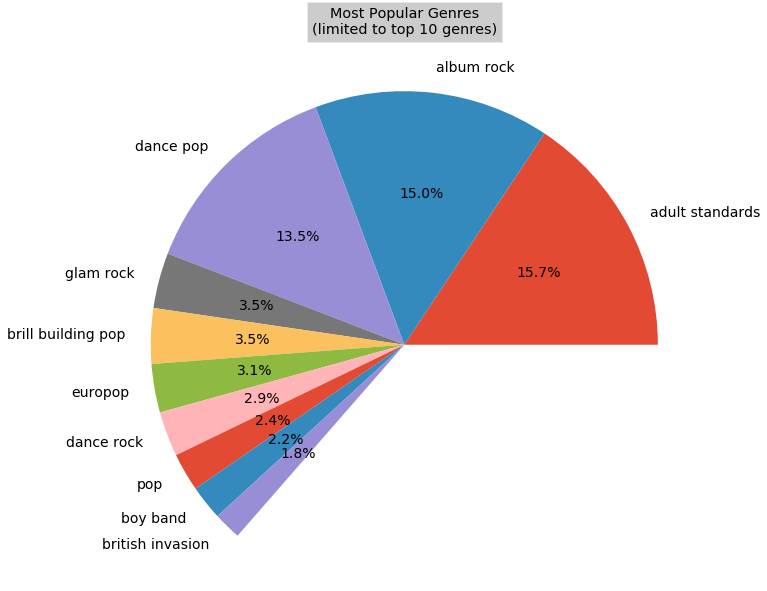

In [396]:
    # Find percent of each genre
    df_genre = class_train['top genre'].value_counts()[:10].sort_values(ascending=False) / len(class_train)
    sizes = df_genre.values.tolist()
    labels = df_genre.index.values.tolist()

    # Pie chart for genre
    fig1, ax1 = plt.subplots(figsize=(10,10))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
    ax1.axis('equal')
    plt.title("Most Popular Genres\n" + "(limited to top 10 genres)", bbox={'facecolor':'0.8', 'pad':5})
    plt.show()

The 86 genre types would not have been possible to visualise in a pie chart (many of the genres contain only 1 song). Therefore only the top 10 genre types were included in the visualisation (the remaining 76 genres equate to 36.2% of all the songs within the dataset)

### Artist

In [18]:
# Most Active Artists...
class_train['artist'].unique()
class_train['artist'].nunique() 
class_train['artist'].value_counts()[:10].sort_values(ascending=False)

Elton John         9
ABBA               7
Queen              7
The Beatles        6
Rihanna            5
Mariah Carey       5
Whitney Houston    5
Taylor Swift       4
Bobby Vee          3
Bryan Adams        3
Name: artist, dtype: int64

There are 331 unique artists within the class_train dataset. The top 10 artists are: Elton John with 9,ABBA        with       7,
Queen     with         7,
The Beatles    with    6,
Rihanna      with      5,
Mariah Carey   with    5,
Whitney Houston with    5,
Taylor Swift   with    4,
Bobby Vee      with    3,
Frank Sinatra   with   3.

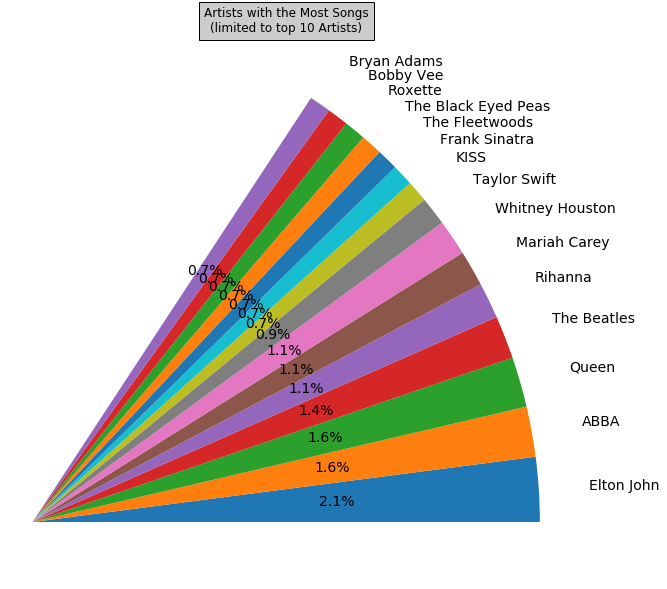

In [19]:
# Find percent of each genre
df_genre = class_train['artist'].value_counts()[:15].sort_values(ascending=False) / len(class_train)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()

# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
plt.title("Artists with the Most Songs\n" + "(limited to top 10 Artists)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

The pie chart was limited to the 15 artists with the most songs in the class_test dataset. Otherwise the pie chart is unreadable.

## Feature Distribution

### Histograms

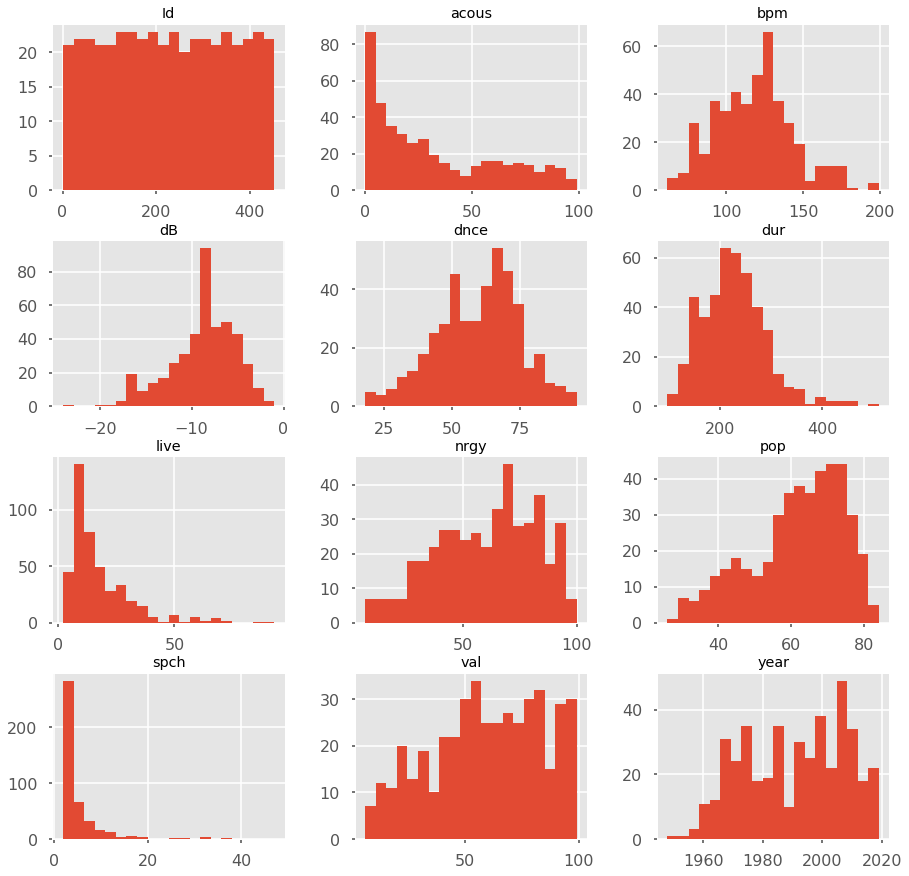

In [234]:
import matplotlib.pyplot as plt
%matplotlib inline
class_train.hist(bins=20, figsize=(15,15))
plt.show()

### Boxplots

In [21]:
#changing plot style
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

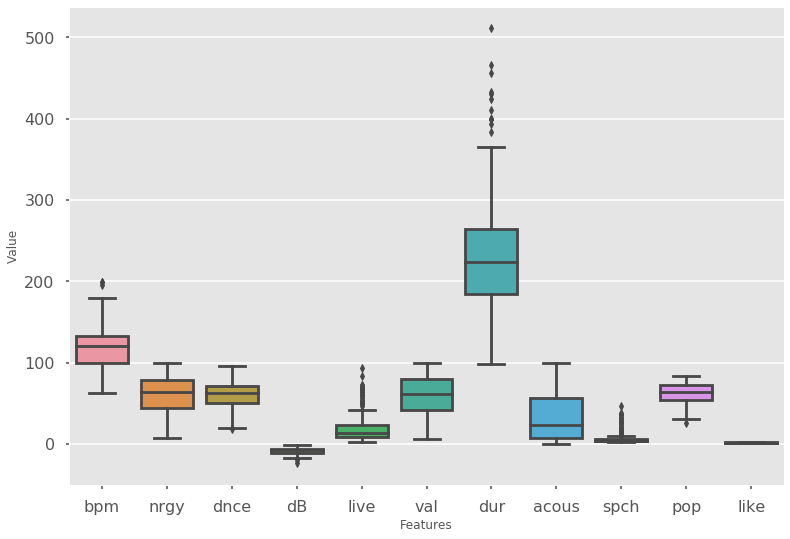

In [22]:
# BOXPLOTS (numeric variables only)
import seaborn as sns 
sns.boxplot(data=class_train.drop(['Id','title', 'artist', 'top genre', 'year'], axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

It is clear that the distribution in the "dB" and "spch" features is very small in comparison to the others, therefore to get a clearer view of the other features they will be removed from the plot. 

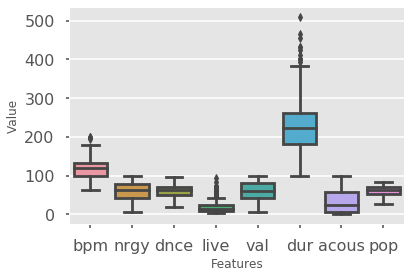

In [462]:
# BOXPLOTS (numeric variables only + dB and spch)
import seaborn as sns 
sns.boxplot(data=class_train.drop(['Id','title', 'artist', 'top genre', 'year', 'dB','spch'], axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

nrgy, nce, val, acous, pop look to be on a scale of 0 to 100? Where 100 is the most popular, and 0 is the least popular.

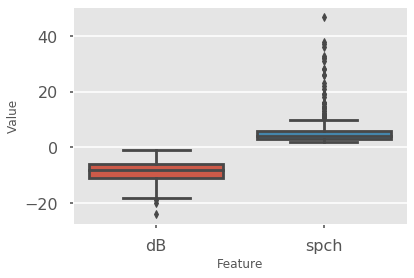

In [459]:
# dB and spch on their own 
import seaborn as sns 
sns.boxplot(data=class_train.drop(['live','val','Id','title', 'artist', 'top genre', 'bpm','nrgy','dnce','dur','acous','pop', 'year'], axis=1))
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

## OUTLIERS

The histograms above show that some variables are obiously skewed (acous, live, spch), are reason for this skew could be outliers. Therefore the skew could be remedied by removing potential outliers. Outliers can be identified using Box-plots.

#### Boxplots

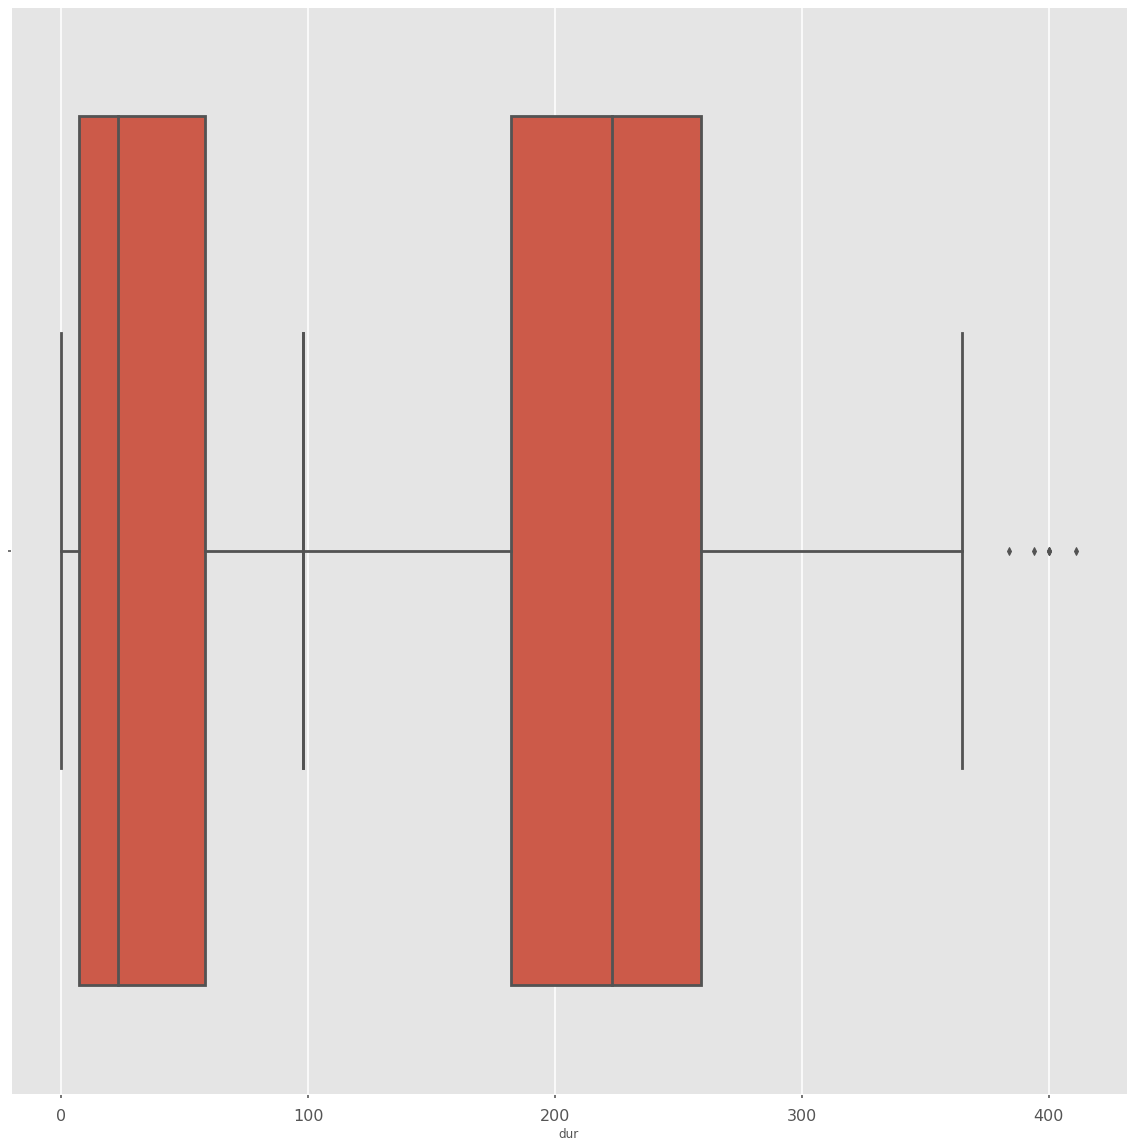

In [578]:
import seaborn as sns
# acoustic
sns.boxplot(x=class_train['acous']) # no visible outliers

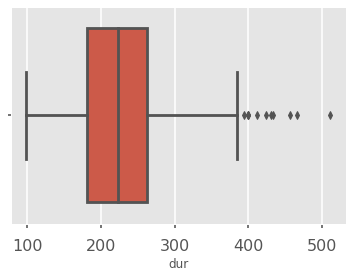

In [464]:
import seaborn as sns
# dur
sns.boxplot(x=class_train['dur']) # no visible outliers

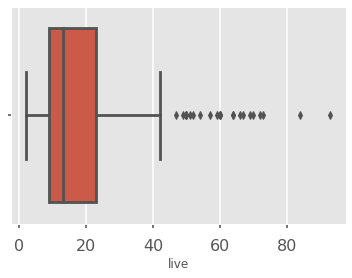

In [465]:
import seaborn as sns
# live
sns.boxplot(x=class_train['live']) #OUTLIERS !!

#### Z - score
Any Z-score greater than 3 or less than -3 is considered to be an outlier.

In [467]:
class_train.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,pop
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [553]:


class_train= class_train[np.abs(class_train.live-class_train.live.mean()) <= (3*class_train.live.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

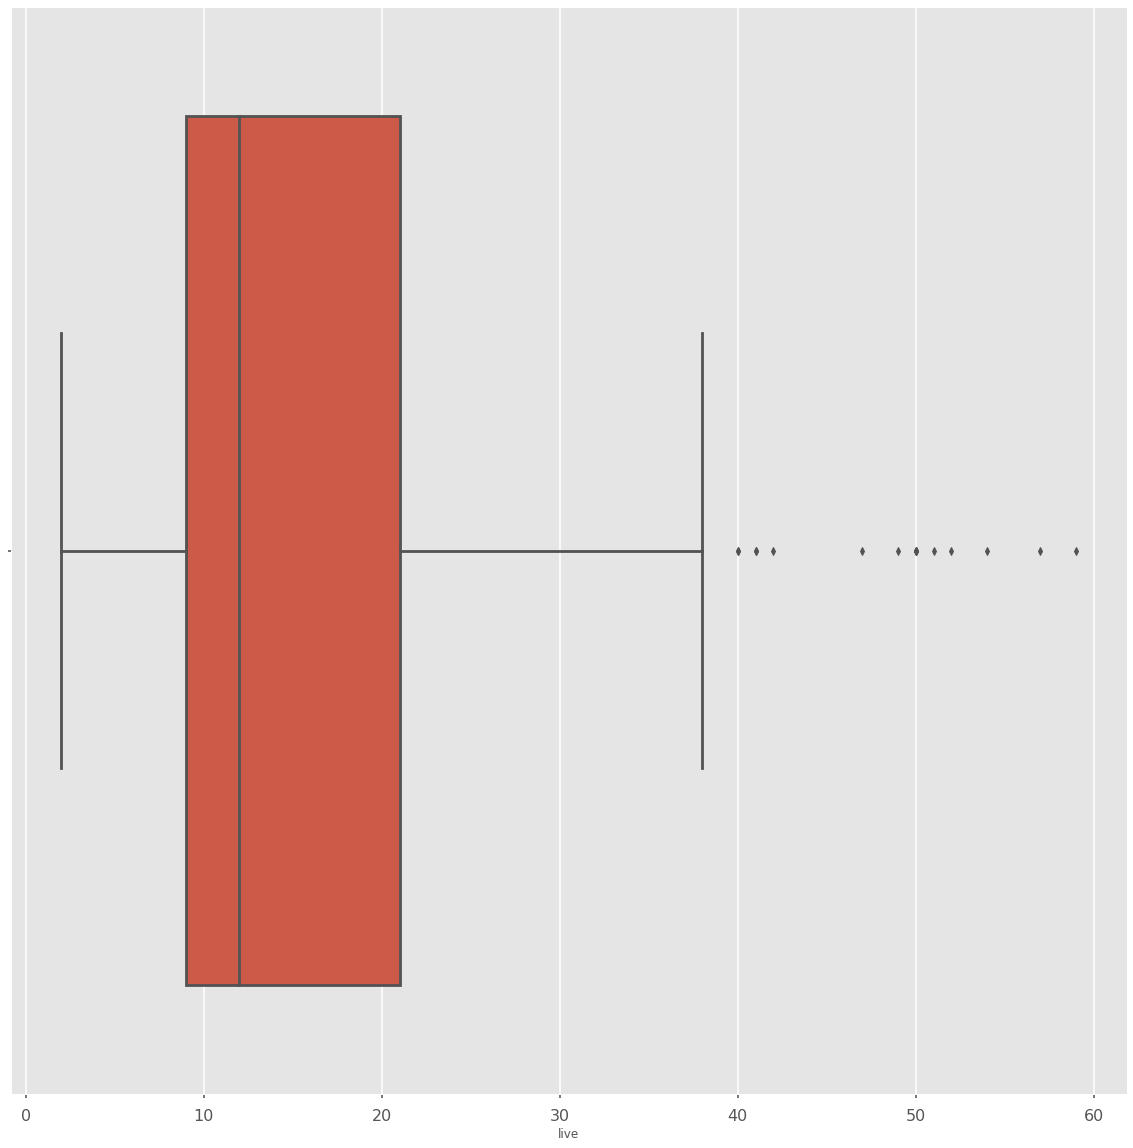

In [554]:
import seaborn as sns
# live
sns.boxplot(x=df['live']) #OUTLIERS !!
# check for MISSING values / null values

In [555]:


class_train= class_train[np.abs(class_train.spch-class_train.spch.mean()) <= (3*class_train.spch.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.



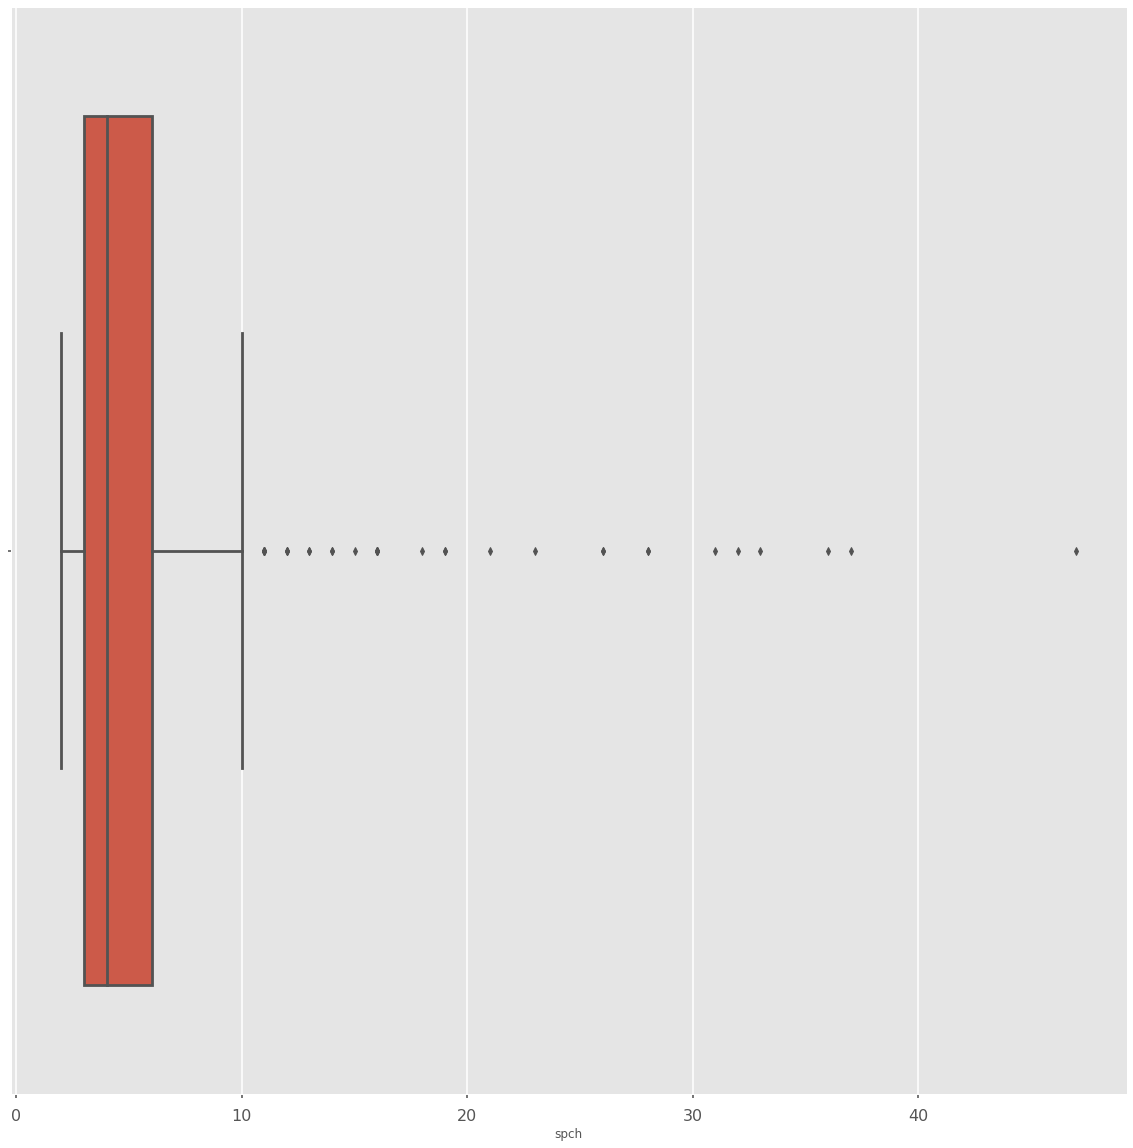

In [556]:
import seaborn as sns
# live
sns.boxplot(x=df['spch']) #OUTLIERS !!

In [557]:

class_train= class_train[np.abs(class_train.dur-class_train.dur.mean()) <= (3*class_train.dur.std())]

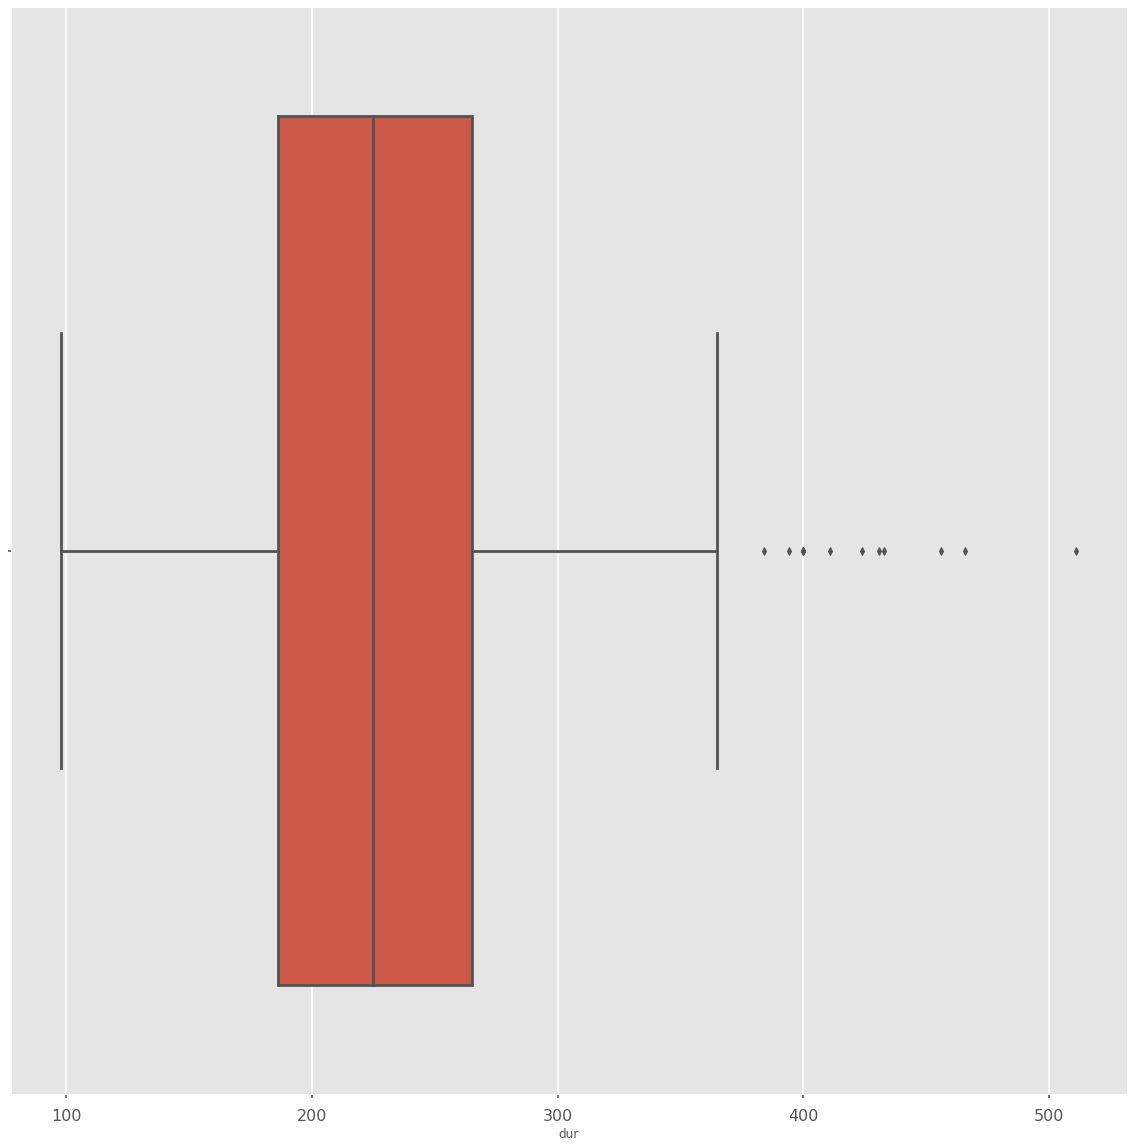

In [558]:
import seaborn as sns
# live
sns.boxplot(x=df['dur']) #OUTLIERS !!

Less outliers... now to check to see if they are still skewed:
    

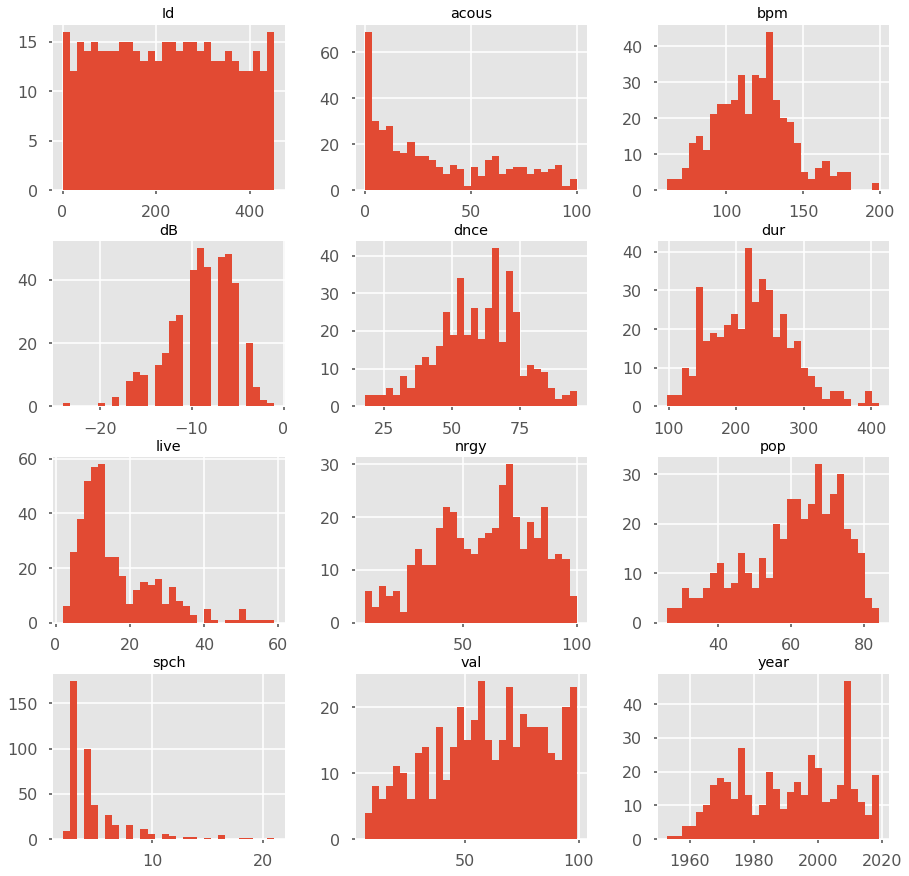

In [474]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=30, figsize=(15,15))
plt.show()

## Correlation

In [25]:
corr_matrix = class_train.corr()
corr_matrix['pop'].sort_values(ascending= False) # what determines a popular song? 
# there are no strong correlations to other variables (highest correlation coefficient is .321)

pop      1.000000
dur      0.321028
dB       0.312952
nrgy     0.274006
dnce     0.256099
spch     0.130346
Id       0.072073
bpm      0.042695
year     0.018926
live    -0.025493
val     -0.040035
acous   -0.443763
like    -0.823679
Name: pop, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F79F490>,
      dtype=object)

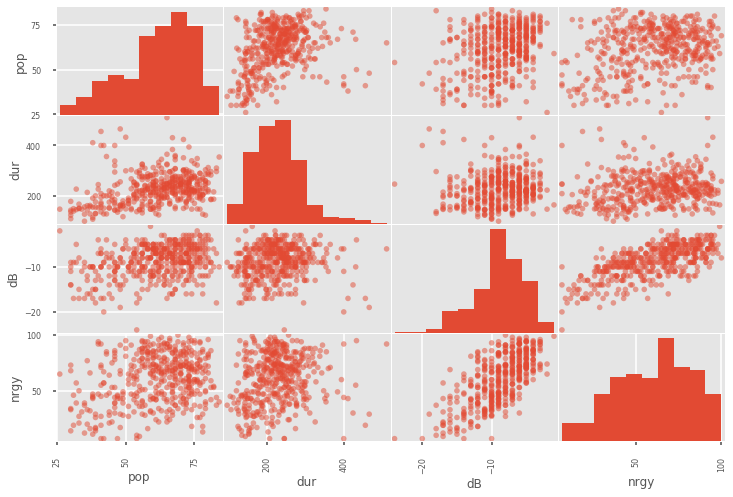

In [26]:
from pandas.plotting import scatter_matrix
attributes = ["pop", "dur","dB","nrgy"]
scatter_matrix(class_train[attributes], figsize=(12,8))

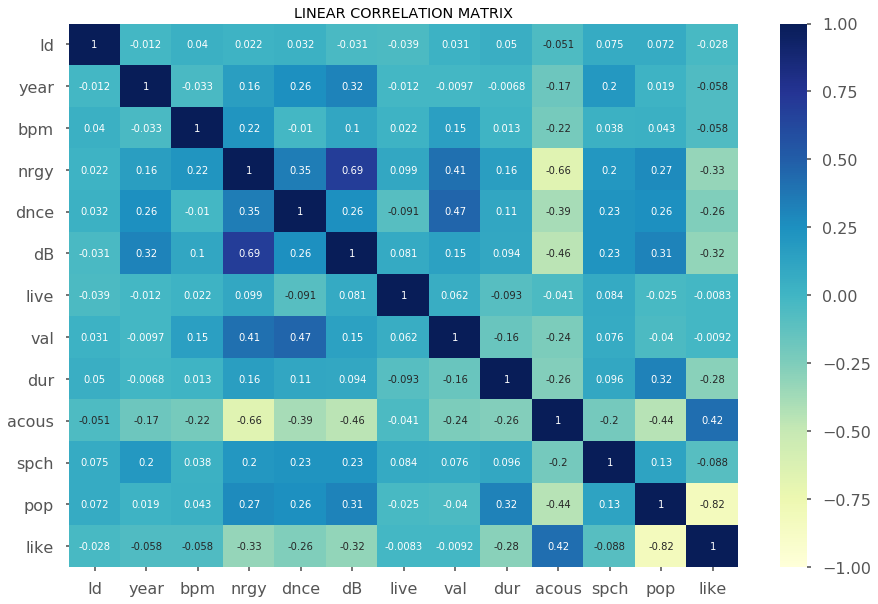

In [27]:
# Plot linear correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(class_train.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('LINEAR CORRELATION MATRIX')
plt.show()

# CLASS_TEST - DATA ANALYSIS

In [28]:
# dimensions: 113 rows × 14 columns
class_test 

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,563,Candy Shop,50 Cent,2005,125,57,61,-8,38,76,209,3,47,78
109,564,Dragostea Din Tei - Italian Version,O-Zone,2010,130,89,67,-6,10,80,215,4,3,44
110,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,1994,84,58,78,-7,14,76,253,43,27,74
111,566,YMCA - Original Version 1978,Village People,1978,127,97,72,-5,12,73,287,6,14,71


In [130]:
# columns
list(class_test.columns.values.tolist()) 


['Id',
 'title',
 'artist',
 'year',
 'bpm',
 'nrgy',
 'dnce',
 'dB',
 'live',
 'val',
 'dur',
 'acous',
 'spch',
 'pop']

There are 14 columns/features: 'Id',
 'title',
 'artist',
 'year',
 'bpm',
 'nrgy',
 'dnce',
 'dB',
 'live',
 'val',
 'dur',
 'acous',
 'spch',
 'pop'

### Missing Values

Id        0
title     0
artist    0
year      0
bpm       0
nrgy      0
dnce      0
dB        0
live      0
val       0
dur       0
acous     0
spch      0
pop       0
dtype: int64

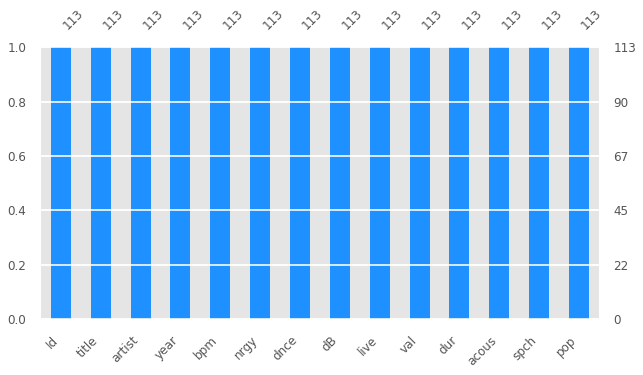

In [30]:
# check for MISSING values / null values
import missingno as msno
msno.bar(class_test, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
class_test.isnull().sum() 

There are no missing values in the class_test dataset.

### Artists

In [31]:
# Most Active Artists...
class_test['artist'].unique()
class_test['artist'].nunique() 
class_test['artist'].value_counts()[:10].sort_values(ascending=False)

Queen                   4
Elton John              3
Barbra Streisand        3
Dolly Parton            2
Dean Martin             2
Lionel Richie           2
ABBA                    2
Phil Collins            2
The Notorious B.I.G.    2
O-Zone                  1
Name: artist, dtype: int64

Within the class_test dataset there are 100 unique artists. The 10 artists with the most songs in the dataset are: Queen          with         4,
Elton John         with     3,
Barbra Streisand    with    3,
Lionel Richie          with 2,
ABBA                    with with 2,
Dean Martin       with      2
Phil Collins      with      2,
The Notorious B.I.G. with   2,
Dolly Parton      with      2,
Whitney Houston    with     1.

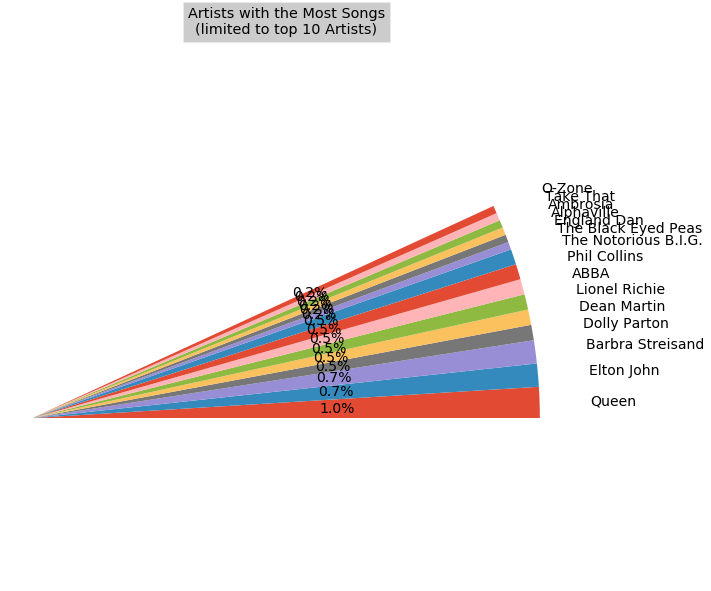

In [577]:
# Find percent of each genre
df_genre = class_test['artist'].value_counts()[:15].sort_values(ascending=False) / len(class_train)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()

# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
plt.title("Artists with the Most Songs\n" + "(limited to top 10 Artists)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

The majority of the artists only have one song in the class_test dataset.

## Feature Distribution

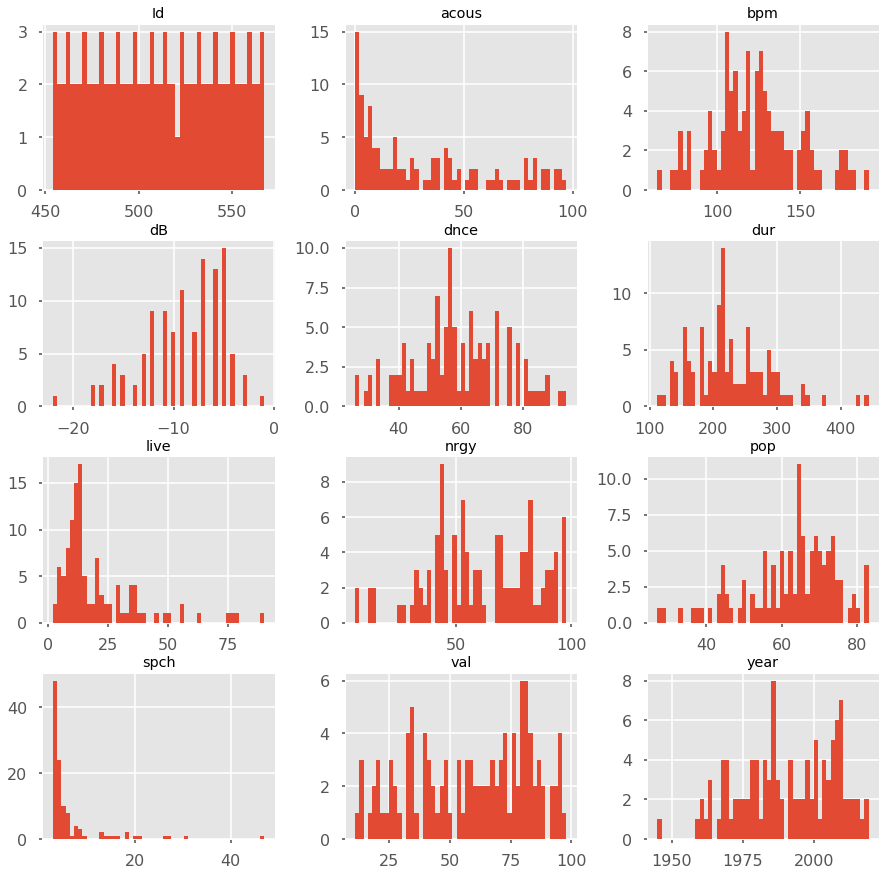

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
class_test.hist(bins=50, figsize=(15,15))
plt.show()

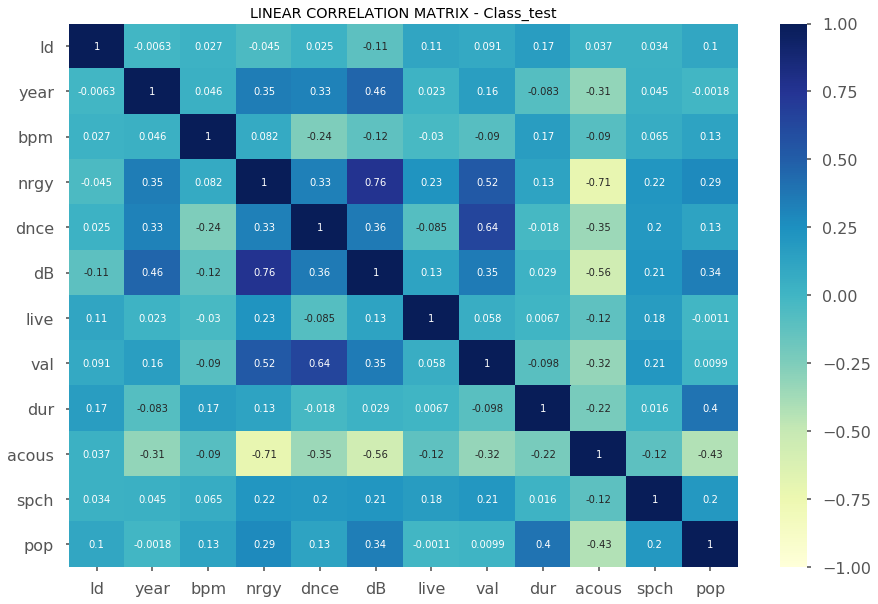

In [34]:
# Plot linear correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(class_test.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('LINEAR CORRELATION MATRIX - Class_test')
plt.show()

# THE CLASSIFIER

The data is already split into training and test (80% / 20%) so training_test_split does not have to be used.

In [35]:
print("Training size: {}; Test size {}.".format(len(class_train), len(class_test)))

Training size: 438; Test size 113.


#### create more general genre categories...

There have been 86 unique genres within the class_train dataset. In order to proceed with the classification we will create more general genre categories.

In [36]:

conditions = [
    (class_train['top genre'] == 'adult standards'),
    (class_train['top genre'] =='album rock'),
    (class_train['top genre'] == 'dance pop'),
    (class_train['top genre'] == 'brill building pop'),
    (class_train['top genre'] == 'glam rock'),
    (class_train['top genre'] == 'dance rock'),
    (class_train['top genre'] == 'boy band'),
    (class_train['top genre'] == 'british invasion'),
    (class_train['top genre'] == 'art rock'),
    (class_train['top genre'] == 'disco'),
    (class_train['top genre'] == 'bubblegum dance'),
    (class_train['top genre'] == 'deep adult standards'),
    (class_train['top genre'] == 'eurodance'),
    (class_train['top genre'] == 'barbadian pop'),
    (class_train['top genre'] == 'atl hip hop'),
    (class_train['top genre'] == 'british soul'),
    (class_train['top genre'] == 'pop'),
    (class_train['top genre'] == 'classic soul'),
    (class_train['top genre'] == 'soft rock'),
    (class_train['top genre'] == 'doo-wop'),
    (class_train['top genre'] == 'classic uk pop'),
    (class_train['top genre'] == 'east coast hip hop'),
    (class_train['top genre'] == 'disco house'),
    (class_train['top genre'] == 'g funk'),
    (class_train['top genre'] == 'new wave pop'),
    (class_train['top genre'] == 'merseybeat'),
    (class_train['top genre'] == 'celtic rock'),
    (class_train['top genre'] == 'celtic rock'),
    (class_train['top genre'] == 'glam metal'),
    (class_train['top genre'] == 'alternative metal'),
    (class_train['top genre'] == 'detroit hip hop'),
    (class_train['top genre'] == 'permanent wave'),
    (class_train['top genre'] == 'chicago rap'),
    (class_train['top genre'] == 'classic rock'),
    (class_train['top genre'] == 'chanson'),
    (class_train['top genre'] == 'art pop'),
    (class_train['top genre'] == 'british folk'),
    (class_train['top genre'] == 'canadian pop'),
    (class_train['top genre'] == 'bebop'),
    (class_train['top genre'] == 'hip hop'),
    (class_train['top genre'] == 'belgian pop'),
    (class_train['top genre'] == 'chicago soul'),
    (class_train['top genre'] == 'country rock'),
    (class_train['top genre'] == 'bronx hip hop'),
    (class_train['top genre'] == 'blues rock'),
    (class_train['top genre'] == 'big room'),
    (class_train['top genre'] == 'australian talent show'),
    (class_train['top genre'] == 'canadian folk'),
    (class_train['top genre'] == 'boogaloo'),
    (class_train['top genre'] == 'belgian dance'),
    (class_train['top genre'] == 'bubblegum pop'), 
    (class_train['top genre'] == 'american folk revival'),
    (class_train['top genre'] =='baroque pop'),
    (class_train['top genre'] == 'classic danish pop'),
    (class_train['top genre'] == 'afrobeat'),
    (class_train['top genre'] == 'australian rock'),
    (class_train['top genre'] == 'drone folk'),
    (class_train['top genre'] == 'deep house'),
    (class_train['top genre'] == 'afropop'),
    (class_train['top genre'] == 'british blues'),
    (class_train['top genre'] == 'neo mellow'),
    (class_train['top genre'] == 'uk garage'),
    (class_train['top genre'] == 'blues'),
    (class_train['top genre'] == 'r&b'),
    (class_train['top genre'] == 'hip pop'),
    (class_train['top genre'] == 'classic girl group'),
    (class_train['top genre'] == 'hi-nrg'),
    (class_train['top genre'] == 'yodeling'),
    (class_train['top genre'] == 'british dance band'),
    (class_train['top genre'] == 'italian pop'),
    (class_train['top genre'] == 'german alternative rock'),
    (class_train['top genre'] == 'louisiana blues'),
    (class_train['top genre'] == 'country'),
    (class_train['top genre'] == 'brit funk'),
    (class_train['top genre'] == 'bubble trance'),
    (class_train['top genre'] == 'alternative rock'),
    (class_train['top genre'] == 'acoustic blues'),
    (class_train['top genre'] == 'avant-garde jazz'),
    (class_train['top genre'] == 'rock-and-roll'),
    (class_train['top genre'] == 'mellow gold'),
    (class_train['top genre'] == 'german dance'),
    (class_train['top genre'] == 'bow pop'),
    (class_train['top genre'] == 'britpop'),
    (class_train['top genre'] == 'latin'),
    (class_train['top genre'] == 'british comedy'),
    (class_train['top genre'] == 'glam punk'),
    (class_train['top genre'] == 'europop'),
]
    
    
    

values =  ['adult','rock','pop','pop','rock','pop','rock','pop','pop','rock','dance','dance','adult' ,'dance','pop','hiphop','jazz','pop','jazz','rock','jazz','pop','hiphop','dance','hiphop','pop','rock','rock','rock','rock','hiphop','rock','hiphop','rock','chanson','pop','folk','pop','jazz','hiphop','pop','jazz','rock','hiphop','rock','dance','tshow','folk','dance','dance','pop','folk','pop','pop','dance','rock','folk','dance','pop','jazz','pop','dance','jazz','jazz','hiphop','pop','dance','yodel','dance','pop','rock','jazz','country','pop','dance','rock','jazz','jazz','rock','folk','dance','pop','pop','latin','comedy','rock','pop']
class_train['genre'] = np.select(conditions, values)

C:\Users\caela\anaconda3\lib\site-packages\ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [57]:
class_train['genre'].unique()
class_train['genre'].nunique()
class_train['genre'].value_counts().sort_values(ascending=False)

pop        152
rock       122
adult       74
dance       33
jazz        24
hiphop      20
folk         6
chanson      2
yodel        1
comedy       1
country      1
latin        1
tshow        1
Name: genre, dtype: int64

All songs have now been put into 13 unique categories: pop        (152),
rock       (122),
adult       (74),
dance       (33),
jazz        (24),
hiphop      (20),
folk         (6),
chanson      (2),
tshow        (1),
yodel        (1),
latin        (1),
comedy       (1),
country      (1)

In [38]:
# generalising further, putting 'tshow','yodel','latin','country','comedy','chanson in other category
#class_train['genre'] = class_train['genre'].replace(['tshow','yodel','latin','country','comedy','chanson'],'other')

In [ ]:
# check
class_train['genre'].unique()
class_train['genre'].nunique()
class_train['genre'].value_counts().sort_values(ascending=False)
# could potentially drop the 7 other values? 
# there are now 8 genres of music in the class_train dataset


In [ ]:
is_0 =  class_train['genre']== '0'
class_train_0 = class_train[is_0]
print(class_train_0)

In [ ]:
is_rocl =  class_train['genre']== 'rocl'
class_rocl = class_train[is_0]
print(class_rocl)

## Validation Set
The training set has been split into a training size 372, and test size of 66.

In [39]:
#creating a validation set
from sklearn.model_selection import train_test_split
train, test = train_test_split(class_train, test_size = 0.15)
print("Training size: {}; Test size {}.".format(len(train), len(test)))
test

Training size: 372; Test size 66.


,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre,like,genre
150,151,Higher Love - Single Version,Steve Winwood,2007,99,89,70,-7,50,92,252,6,4,66,album rock,1,rock
11,12,Nikita,Elton John,1985,87,66,63,-9,7,75,343,12,3,68,glam rock,1,rock
393,394,Here I Go Again - 2017 Remaster,Whitesnake,1987,90,85,38,-6,9,27,276,15,4,58,album rock,1,rock
210,211,Love Comes To Everyone - 2004 Mix,George Harrison,1979,107,68,72,-9,5,51,276,7,4,55,album rock,1,rock
34,35,Can't Help Falling in Love,Elvis Presley,1961,100,29,40,-14,11,34,182,94,3,78,adult standards,1,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,155,Brothers In Arms,Dire Straits,1985,79,30,41,-14,18,14,424,53,3,71,album rock,1,rock
240,241,Brother Louie,Modern Talking,1986,109,84,78,-9,14,83,223,40,5,67,eurodance,1,adult
199,200,Brandy (You're a Fine Girl),Looking Glass,1972,125,63,72,-11,13,83,187,40,6,73,soft rock,1,jazz
419,420,Jessie's Girl,Rick Springfield,1981,132,59,72,-14,10,85,194,33,5,64,album rock,1,rock


### Feature Selection
The features being included are 'year','bpm','nrgy','dnce','dB','spch','pop','live','acous'. 

In [533]:
from sklearn.tree import DecisionTreeClassifier
c= DecisionTreeClassifier(min_samples_split=100) # setting high parameter to prevent inital overfitting
features = ['year','bpm','nrgy','dnce','dB','spch','pop','live','acous']



In [567]:

X_train = train[features]
y_train = train['genre']

X_test = test[features]
y_test = test['genre']

In [475]:
#X_test = class_test.values[:,3:13]
#y_train = class_train.values[:,14]
#X_train = class_train.values[:,3:13]

In [478]:
import graphviz # conda install -c anaconda graphviz , conda install python-graphviz, conda install pydot, conda install -c anaconda pillow
import pydotplus
import imageio
import io
from scipy import misc
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [568]:
dt = c.fit(X_train, y_train)

In [569]:
def show_tree(tree, features,path):
    f = io.StringIO()
    export_graphviz(tree,out_file=f, feature_names=features) # will save to disk
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams['figure.figsize'] = (20,20)
    plt.imshow(img)

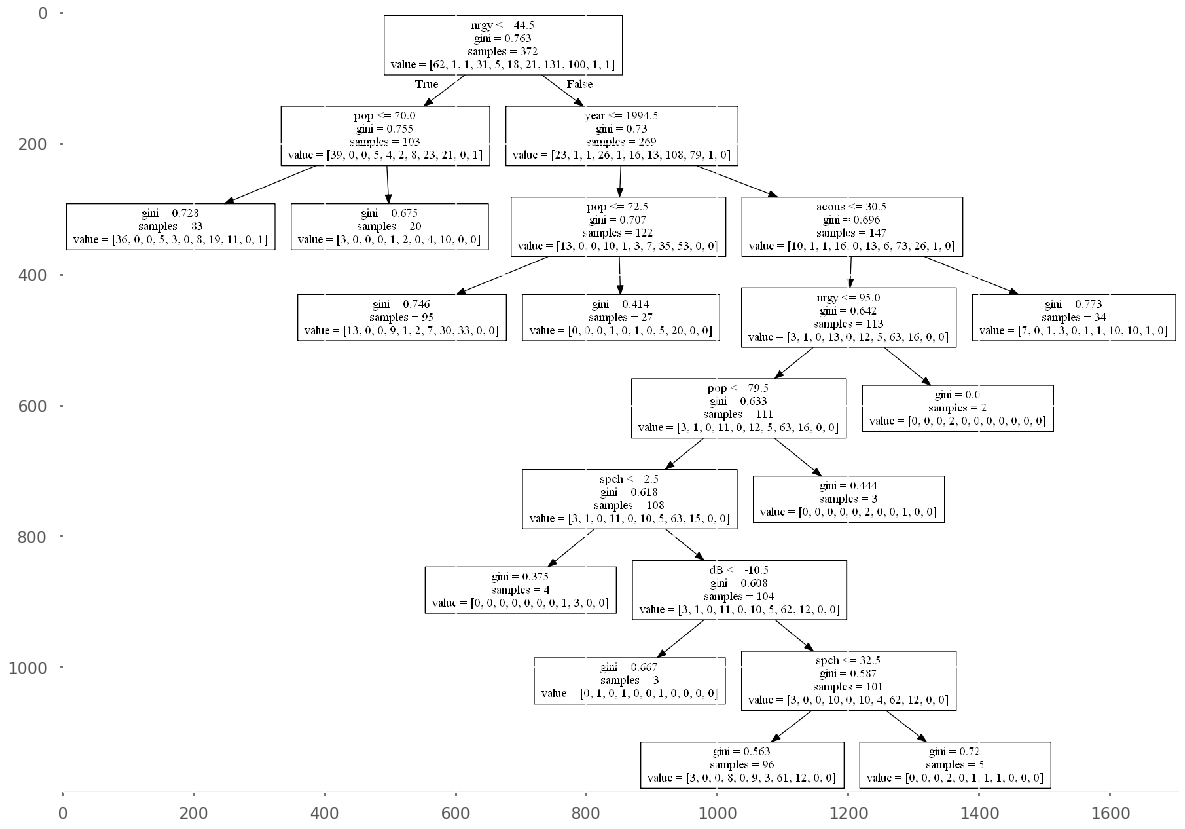

In [481]:
show_tree(dt, features, 'dec1.png')

The benefit of decision trees is that they are interpretable, unlike black box neural networks. The first question the decision tree is asking is whether or not the energy of the song is greater or less than 44.5 - this is being asked on the entire training set (samples = 372). In the grand scheme of things Decision Trees also require little data preparation which is beneficial. 

In [570]:
y_pred = c.predict(X_test)

In [119]:
y_pred

array(['pop', 'rock', 'rock', 'rock', 'rock', 'rock', 'pop', 'adult',
       'pop', 'rock', 'rock', 'rock', 'pop', 'rock', 'rock', 'pop',
       'rock', 'pop', 'rock', 'adult', 'rock', 'rock', 'rock', 'rock',
       'pop', 'rock', 'pop', 'rock', 'pop', 'rock', 'pop', 'adult',
       'rock', 'rock', 'adult', 'pop', 'pop', 'pop', 'pop', 'rock',
       'rock', 'pop', 'pop', 'rock', 'pop', 'rock', 'adult', 'rock',
       'pop', 'rock', 'rock', 'pop', 'rock', 'pop', 'rock', 'pop', 'rock',
       'rock', 'adult', 'pop', 'pop', 'rock', 'rock', 'rock', 'rock',
       'chanson'], dtype=object)

In [571]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)*100


In [572]:
print('Accuracy of Decision Tree: ', round(score),"%")

Accuracy of Decision Tree:  47.0 %


### Random Forest Classification

In [573]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [574]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_train, y_train)

C:\Users\caela\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [575]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, ypred))

C:\Users\caela\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LogisticRegression 0.36363636363636365
RandomForestClassifier 0.4393939393939394
SVC 0.3181818181818182
VotingClassifier 0.4393939393939394


C:\Users\caela\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Soft Voting

In [537]:
svm_clf = SVC(probability=True)
VotingClassifier(estimators=[('lr', LogisticRegression()),('rf', RandomForestClassifier()), ('svc', SVC())], voting='soft')

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [545]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, ypred))

C:\Users\caela\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

LogisticRegression 0.36363636363636365
RandomForestClassifier 0.45454545454545453


C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

OneVsRestClassifier 0.3939393939393939


C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

VotingClassifier 0.3787878787878788


## Bagging...

In [549]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Reduced number of estimators and dt size
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=25,
    max_samples=50, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
ypred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [66, 113]

In [548]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=25, max_samples=50,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=42)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.3763440860215054

### Random Forest

In [547]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=25, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
ypred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, ypred))

0.45454545454545453


### the best model...

#### DROPPPING COLUMNS WITH SKEWS

In [391]:
class_test.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44


In [285]:
#class_test_out = class_test.drop(['live', 'spch'], axis=1)
#class_test_out.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,val,dur,acous,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,74,213,1,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,14,292,26,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,18,179,38,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,53,216,6,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,34,153,18,44


In [286]:
#class_train_out = class_train.drop(['live', 'spch'], axis=1)
#class_train_out.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,val,dur,acous,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,28,150,75,44,adult standards
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,67,245,11,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,33,232,25,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,40,193,45,63,glam rock
5,6,Grenade,Bruno Mars,2010,110,56,71,-7,23,223,15,74,pop


In [560]:
# adding new data
X_test = class_test.values[:,3:13]
y_train = class_train.values[:,14]
X_train = class_train.values[:,3:13]

In [519]:

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=25, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

In [520]:
y_pred = c.predict(X_test)
y_pred

array(['dance pop', 'dance pop', 'adult standards', 'dance pop',
       'adult standards', 'album rock', 'album rock',
       'brill building pop', 'dance pop', 'album rock', 'dance pop',
       'dance pop', 'dance pop', 'album rock', 'dance pop', 'dance pop',
       'brill building pop', 'dance pop', 'dance pop', 'dance pop',
       'adult standards', 'adult standards', 'adult standards',
       'adult standards', 'album rock', 'album rock', 'dance pop',
       'adult standards', 'adult standards', 'dance pop', 'dance pop',
       'adult standards', 'adult standards', 'dance pop', 'album rock',
       'dance pop', 'dance pop', 'adult standards', 'dance pop',
       'dance pop', 'album rock', 'adult standards', 'album rock',
       'adult standards', 'adult standards', 'dance pop', 'album rock',
       'dance pop', 'album rock', 'album rock', 'adult standards',
       'adult standards', 'album rock', 'adult standards',
       'adult standards', 'adult standards', 'album rock',
       '

In [521]:
index = class_test['Id']
voting_pred=pd.DataFrame({'Id':index,'top genre':ypred})
voting_pred.to_csv('voting_class.csv', index = False)

In [329]:
# LESS OUTLIERS
X_test = df.values[:,3:13]
y_train = df.values[:,14]
X_train = df.values[:,3:13]


In [493]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=25, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [331]:
ypred = rnd_clf.predict(X_test)

In [333]:
# Having generated an array of preditions, put these into a data frame
resultsDF = pd.DataFrame(ypred) 
# Use the 'Id' column from your test data to create the index
resultsDF.set_index(class_test['Id'], inplace=True)
# rename the column of predictions as 'pop'
resultsDF.rename(columns={0:'top genre'}, inplace=True) 
# and write the dataframe out to a .csv file
resultsDF.to_csv('results.csv') 

In [293]:
index = class_test['Id']
voting_pred=pd.DataFrame({'Id':index,'top genre':ypred})
voting_pred.to_csv('voting_class.csv', index = False)
#files.download("voting_class.csv")
voting_pred.to_csv('results.csv') 

## crawford's model

In [561]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


In [562]:
log_clf = LogisticRegression(max_iter=1000, penalty = "l2", C=1)
rnd_clf = RandomForestClassifier()
svm_clf = OneVsRestClassifier(LinearSVC(C=0.01, loss = "hinge", random_state = 42))
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_train, y_train)

C:\Users\caela\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, 

C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\caela\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                            

In [563]:
print(accuracy_score(y_test, ypred))

0.3939393939393939


In [564]:
ypred = voting_clf.predict(X_test)

In [565]:
index = class_test['Id']
voting_pred=pd.DataFrame({'Id':index,'top genre':ypred})
voting_pred.to_csv('voting_class.csv', index = False)


In [566]:
voting_pred


,Id,top genre
0,454,alternative metal
1,455,album rock
2,456,adult standards
3,457,german dance
4,458,adult standards
...,...,...
108,563,british blues
109,564,album rock
110,565,british blues
111,566,dance pop
